In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
df = pd.read_excel('/content/V2.xlsx')

In [ ]:
df.head()

,Region,Neighborhood,Area,Beds,Baths,Drawing,Dining,Bachelor,Features,Floor,Location,Rent,Service Charge,Total Cost
0,Mohammadia Housing Limited,Upper Middle Class,1250.0,3,3,1,1,0,Very Good,5.0,Road -8,25000,NaN,25000
1,Mohammadia Housing Limited,Upper Middle Class,700.0,2,1,0,0,0,Good,8.0,Road -3,14000,NaN,14000
2,Mohammadia Housing Limited,Upper Middle Class,1200.0,3,3,1,1,0,Very Good,2.0,Road-6,20000,NaN,20000
3,Mohammadia Housing Limited,Upper Middle Class,900.0,3,2,1,1,0,Average,4.0,Road-6,18000,NaN,18000
4,Mohammadia Housing Limited,Upper Middle Class,800.0,3,2,0,1,0,Average,1.0,Road-6,15000,NaN,15000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          103 non-null    object 
 1   Neighborhood    103 non-null    object 
 2   Area            85 non-null     float64
 3   Beds            103 non-null    int64  
 4   Baths           103 non-null    int64  
 5   Drawing         103 non-null    int64  
 6   Dining          103 non-null    int64  
 7   Bachelor        103 non-null    int64  
 8   Features        103 non-null    object 
 9   Floor           99 non-null     float64
 10  Location        73 non-null     object 
 11  Rent            103 non-null    int64  
 12  Service Charge  47 non-null     float64
 13  Total Cost      103 non-null    int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 11.4+ KB


<Axes: ylabel='Features'>

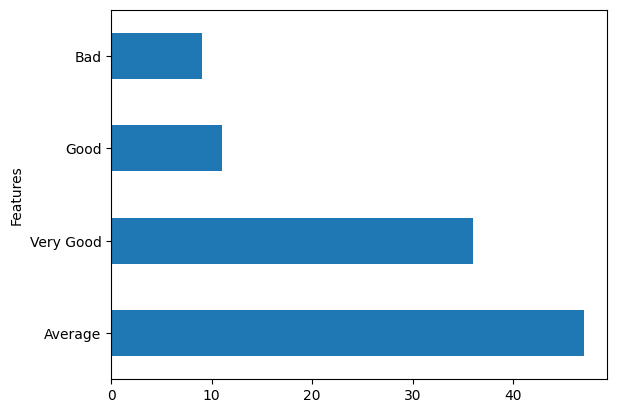

In [ ]:
df['Features'].value_counts().plot(kind ='barh')

### Data  Preprocessing
I.Dropping Unnecesary Columns

In [ ]:
df.drop('Location',axis=1,inplace =True)

In [ ]:
#Checking Missing Value Ratio
pd.DataFrame(df.isnull().sum()*100/len(df),columns=['Missing Value Ratio'])

,Missing Value Ratio
Region,0.000000
Neighborhood,0.000000
Area,17.475728
Beds,0.000000
Baths,0.000000
Drawing,0.000000
Dining,0.000000
Bachelor,0.000000
Features,0.000000
Floor,3.883495


In [ ]:
df.drop(['Service Charge', 'Total Cost'],axis =1,inplace =True)

In [ ]:
df.isnull().sum()

Region           0
Neighborhood     0
Area            18
Beds             0
Baths            0
Drawing          0
Dining           0
Bachelor         0
Features         0
Floor            4
Rent             0
dtype: int64

In [ ]:
df.describe()

,Area,Beds,Baths,Drawing,Dining,Bachelor,Floor,Rent
count,85.000000,103.000000,103.000000,103.000000,103.000000,103.000000,99.00000,103.000000
mean,1062.764706,2.495146,2.339806,0.572816,0.941748,0.145631,5.00000,18636.407767
std,349.010085,0.669706,0.693858,0.497088,0.235365,0.354461,2.07512,6868.360231
min,350.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.00000,550.000000
25%,800.000000,2.000000,2.000000,0.000000,1.000000,0.000000,3.50000,13500.000000
50%,1050.000000,2.000000,2.000000,1.000000,1.000000,0.000000,5.00000,18000.000000
75%,1350.000000,3.000000,3.000000,1.000000,1.000000,0.000000,6.50000,22000.000000
max,1800.000000,5.000000,4.000000,1.000000,1.000000,1.000000,10.00000,37500.000000


II.Missing Value Fillup

In [ ]:
def inputnull(variable,df):
  df[variable+'_update'] = df[variable]
  random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state = 8)
  random_sample.index = df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+"_update"] = random_sample

In [ ]:
inputnull('Area',df)

In [ ]:
inputnull('Floor',df)

In [ ]:
df.isnull().sum()

Region           0
Neighborhood     0
Area            18
Beds             0
Baths            0
Drawing          0
Dining           0
Bachelor         0
Features         0
Floor            4
Rent             0
Area_update      0
Floor_update     0
dtype: int64

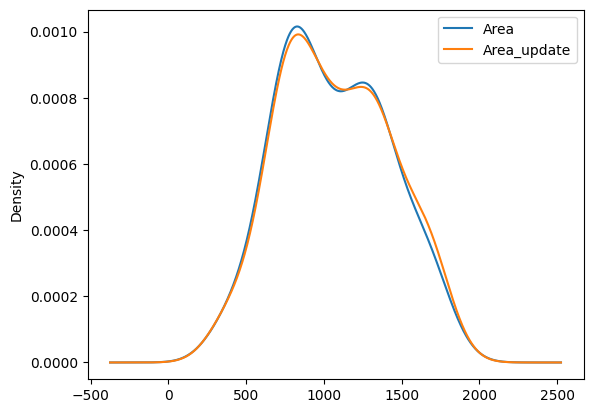

In [ ]:
df['Area'].plot(kind='kde')
df['Area_update'].plot(kind='kde')
plt.legend()



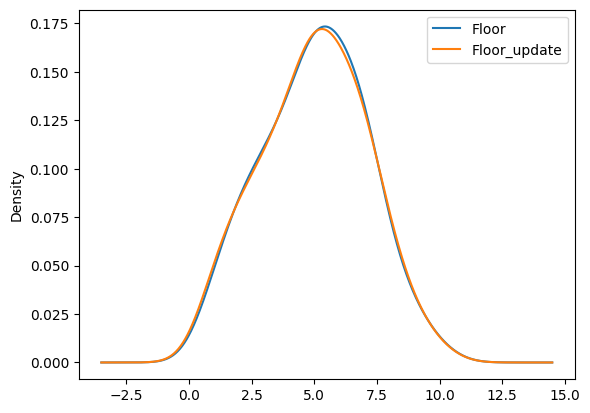

In [ ]:
df['Floor'].plot(kind='kde')
df['Floor_update'].plot(kind='kde')
plt.legend()



In [ ]:
df.drop(['Area','Floor'],axis=1,inplace =True)

In [ ]:
df.rename(columns = {'Area_update': 'Area' ,'Floor_update':'Floor'},inplace =True)

In [ ]:
df


,Region,Neighborhood,Beds,Baths,Drawing,Dining,Bachelor,Features,Rent,Area,Floor
0,Mohammadia Housing Limited,Upper Middle Class,3,3,1,1,0,Very Good,25000,1250.0,5.0
1,Mohammadia Housing Limited,Upper Middle Class,2,1,0,0,0,Good,14000,700.0,8.0
2,Mohammadia Housing Limited,Upper Middle Class,3,3,1,1,0,Very Good,20000,1200.0,2.0
3,Mohammadia Housing Limited,Upper Middle Class,3,2,1,1,0,Average,18000,900.0,4.0
4,Mohammadia Housing Limited,Upper Middle Class,3,2,0,1,0,Average,15000,800.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
98,Tajmahal Road,Upper Class,2,2,1,1,0,Very Good,22000,850.0,4.0
99,Tajmahal Road,Upper Class,3,3,1,1,0,Very Good,25000,1200.0,9.0
100,Tajmahal Road,Upper Class,2,2,1,1,0,Average,20000,1350.0,5.0
101,Tajmahal Road,Upper Class,2,2,0,1,0,Average,15000,800.0,2.0


In [ ]:
df.isnull().sum()

Region          0
Neighborhood    0
Beds            0
Baths           0
Drawing         0
Dining          0
Bachelor        0
Features        0
Rent            0
Area            0
Floor           0
dtype: int64

In [ ]:
df_cleaned = df

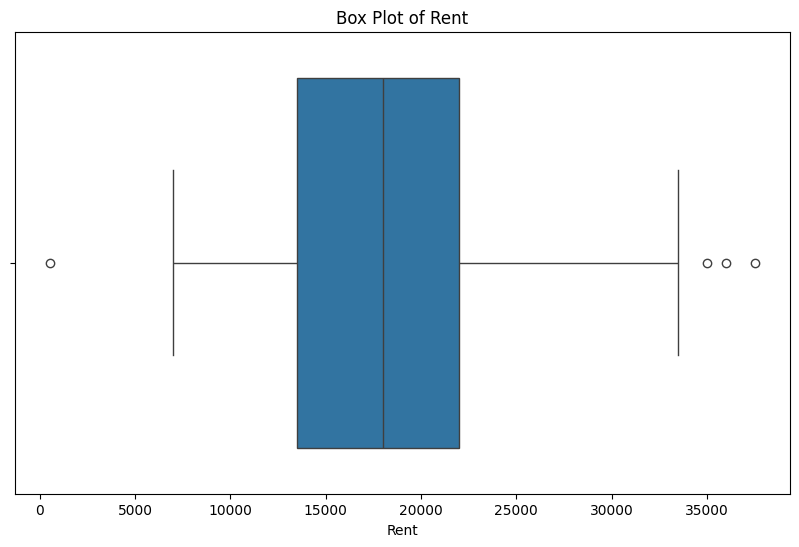

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['Rent'])
plt.title('Box Plot of Rent')
plt.xlabel('Rent')
plt.show()

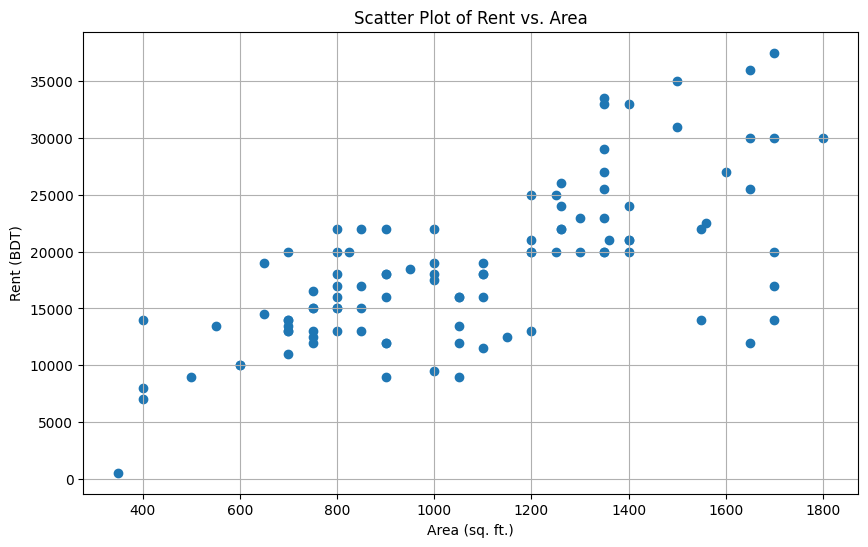

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Area'], df_cleaned['Rent'])
plt.title('Scatter Plot of Rent vs. Area')
plt.xlabel('Area (sq. ft.)')
plt.ylabel('Rent (BDT)')
plt.grid(True)
plt.show()

III.Encoding The Values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
one = le.fit_transform(df['Region'])
two = le.fit_transform(df['Neighborhood'])
three = le.fit_transform(df['Features'])

In [ ]:
df['Region'] =one
df['Neighborhood'] = two
df['Features'] = three

In [ ]:
df_encoded = df

In [ ]:
df.describe()

,Region,Neighborhood,Beds,Baths,Drawing,Dining,Bachelor,Features,Rent,Area,Floor
count,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,2.31068,1.854369,2.495146,2.339806,0.572816,0.941748,0.145631,1.349515,18636.407767,1075.097087,4.980583
std,1.45541,1.207881,0.669706,0.693858,0.497088,0.235365,0.354461,1.362730,6868.360231,354.050083,2.095656
min,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,550.000000,350.000000,1.000000
25%,1.00000,0.500000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,13500.000000,800.000000,3.500000
50%,3.00000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,18000.000000,1050.000000,5.000000
75%,4.00000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,3.000000,22000.000000,1350.000000,6.500000
max,4.00000,3.000000,5.000000,4.000000,1.000000,1.000000,1.000000,3.000000,37500.000000,1800.000000,10.000000


<Axes: ylabel='Region'>

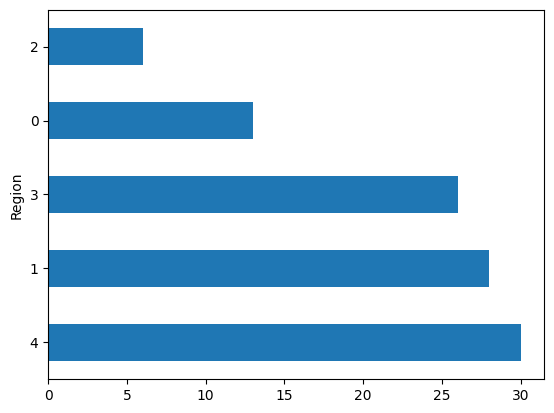

In [ ]:
df_encoded['Region'].value_counts().plot(kind ='barh')


IV.Transforming the values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()

In [ ]:
mnmx =mn.fit_transform(df)

In [ ]:
df = pd.DataFrame(mnmx,columns = df.columns)

<Axes: >

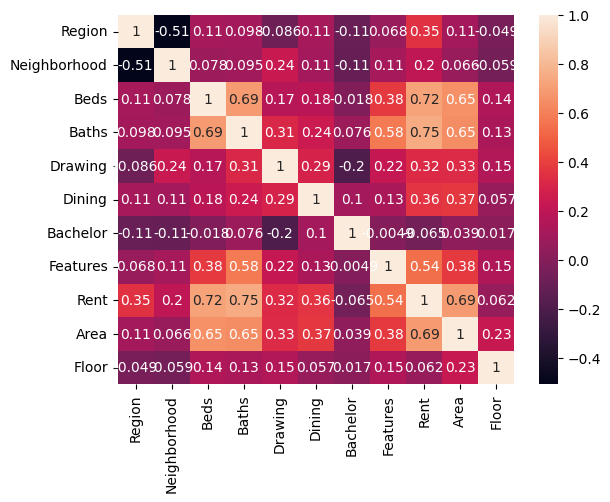

In [ ]:
sns.heatmap(df.corr(),annot =True)

<Axes: ylabel='Features'>

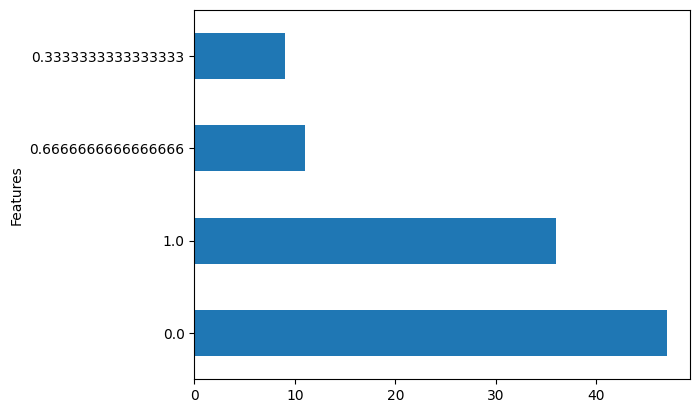

In [ ]:
df['Features'].value_counts().plot(kind='barh')

In [ ]:
df_transformed =df

### Feature Selection

In [ ]:
df.columns

Index(['Region', 'Neighborhood', 'Beds', 'Baths', 'Drawing', 'Dining',
       'Bachelor', 'Features', 'Rent', 'Area', 'Floor'],
      dtype='object')

In [ ]:
features =['Region', 'Neighborhood', 'Beds', 'Baths', 'Drawing', 'Dining',
       'Bachelor', 'Features', 'Area', 'Floor']


In [ ]:
y =df_encoded['Rent']
x=df_encoded[features]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [ ]:
select = SelectKBest(score_func = chi2)
v_select = select.fit(x,y)

In [ ]:
val = pd.DataFrame(v_select.scores_,columns = ['Score'])
col = pd.DataFrame(x.columns,columns=['Columns'])

In [ ]:
feature_select = pd.concat([col,val],axis =1)

In [ ]:
feature_select.sort_values(by ='Score',ascending =False)

,Columns,Score
8,Area,7589.880826
7,Features,75.189894
0,Region,47.907995
9,Floor,36.726114
1,Neighborhood,36.498195
6,Bachelor,32.848182
4,Drawing,17.105052
3,Baths,15.390462
2,Beds,13.072638
5,Dining,3.062199


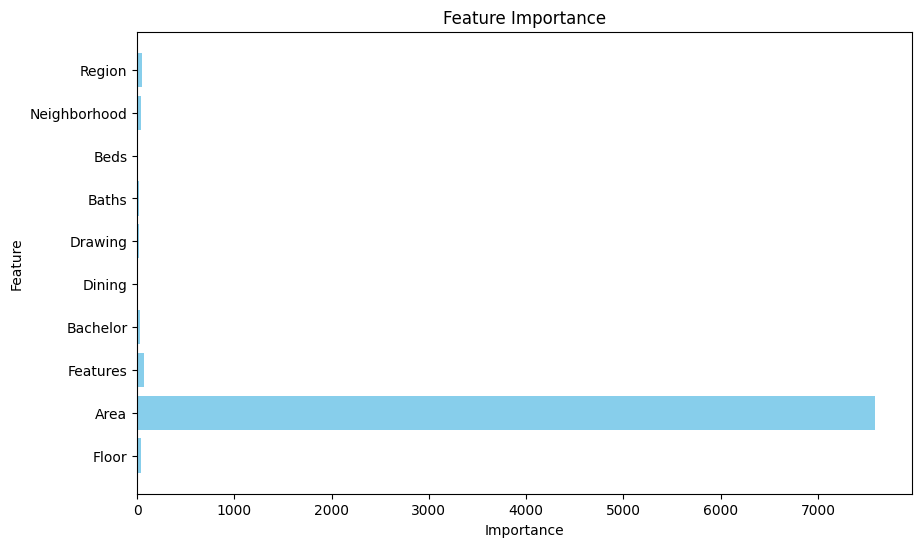

In [ ]:

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_select['Columns'], feature_select['Score'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

### Train Test Split

In [ ]:
y_scaled =df_transformed['Rent']
x_scaled=df_transformed[features]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_scaled,test_size = 0.2,random_state=0)

### Model Evaluation

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from sklearn.svm import SVR


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def calculate_mape(actual, forecast):
    """
    Calculate Mean Absolute Percentage Error (MAPE).

    Parameters:
        actual (list): List of actual values.
        forecast (list): List of forecasted values.

    Returns:
        float: MAPE value.
    """
    if len(actual) != len(forecast):
        raise ValueError("Length of actual and forecast lists must be the same.")

    total_error = 0
    for actual_val, forecast_val in zip(actual, forecast):
        total_error += abs((actual_val - forecast_val) / actual_val)

    mape = (total_error / len(actual)) * 100
    return mape

In [ ]:
def calculatemetrics(y_test,y_predict):

  mape = calculate_mape(y_test, y_predict)
  mae = mean_absolute_error(y_test, y_predict)
  mse = mean_squared_error(y_test, y_predict)
  r2 = r2_score(y_test, y_predict)
  rmse = np.sqrt(mse)
  metrics = {
    'Metric': ['Mean Absolute Percentage Error (MAPE)','Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'r2 Score','Root Mean Squared Error (MSE)'],
    'Value': [mape,mse,mae,r2,rmse]
  }




  return metrics

In [ ]:
#Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
rf_p = rf.predict(x_test)

rf_metrics = calculatemetrics(y_test,rf_p)

print(rf_metrics['Metric'])
print(rf_metrics['Value'])

['Mean Absolute Percentage Error (MAPE)', 'Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'r2 Score', 'Root Mean Squared Error (MSE)']
[15.482163732451943, 0.005376383850530069, 0.05726126806157745, 0.7290666113465891, 0.0733238286679717]


In [ ]:
#DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
dt_p = dt.predict(x_test)

dt_metrics = calculatemetrics(y_test,dt_p)

print(dt_metrics['Metric'])
print(dt_metrics['Value'])

['Mean Absolute Percentage Error (MAPE)', 'Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'r2 Score', 'Root Mean Squared Error (MSE)']
[15.729450019028887, 0.007498774255591882, 0.06572588439976801, 0.6221124874455977, 0.08659546325063387]


In [ ]:
#LinearRegression
lnr = LinearRegression()
lnr.fit(x_train, y_train)
lnr_p = lnr.predict(x_test)

lnr_metrics = calculatemetrics(y_test,lnr_p)

print(lnr_metrics['Metric'])
print(lnr_metrics['Value'])


['Mean Absolute Percentage Error (MAPE)', 'Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'r2 Score', 'Root Mean Squared Error (MSE)']
[12.87954378210696, 0.004369021496700239, 0.04707727324808024, 0.7798308617633601, 0.06609857408976565]


In [ ]:

#LassoRegression
lsr = Lasso(alpha =0.1)
lsr.fit(x_train, y_train)
lsr_p = lsr.predict(x_test)

lsr_metrics = calculatemetrics(y_test,lsr_p)

print(lsr_metrics['Metric'])
print(lsr_metrics['Value'])


['Mean Absolute Percentage Error (MAPE)', 'Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'r2 Score', 'Root Mean Squared Error (MSE)']
[34.51284287657976, 0.021213883564311437, 0.11652199742565761, -0.06903627426288272, 0.1456498663381173]


In [ ]:

#RidgeRegression
rr = Ridge(alpha =0.1)
rr.fit(x_train, y_train)
rr_p = rr.predict(x_test)

rr_metrics = calculatemetrics(y_test,rr_p)

print(rr_metrics['Metric'])
print(rr_metrics['Value'])

['Mean Absolute Percentage Error (MAPE)', 'Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'r2 Score', 'Root Mean Squared Error (MSE)']
[12.90430134954833, 0.0043447749560255825, 0.0474727777109165, 0.7810527234478565, 0.06591490693329986]


In [ ]:

#GradientBOOSTRegression
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)
gbr_p = gbr.predict(x_test)

gbr_metrics = calculatemetrics(y_test,gbr_p)

print(gbr_metrics['Metric'])
print(gbr_metrics['Value'])

['Mean Absolute Percentage Error (MAPE)', 'Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'r2 Score', 'Root Mean Squared Error (MSE)']
[14.977667834507105, 0.004771259141110773, 0.055509955993389044, 0.7595608045885237, 0.0690743015969816]


In [ ]:
#XGBOOSTRegression

xgb = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(x_train, y_train)
xgb_p = xgb.predict(x_test)

xgb_metrics = calculatemetrics(y_test,xgb_p)

print(xgb_metrics['Metric'])
print(xgb_metrics['Value'])

['Mean Absolute Percentage Error (MAPE)', 'Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'r2 Score', 'Root Mean Squared Error (MSE)']
[15.101750798708776, 0.004513393989519459, 0.05212337112402176, 0.7725554644339833, 0.06718179805214697]


In [ ]:
#SVR

svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(x_train, y_train)

svr_p = svr.predict(x_test)

svr_metrics = calculatemetrics(y_test,svr_p)

print(svr_metrics['Metric'])
print(svr_metrics['Value'])

['Mean Absolute Percentage Error (MAPE)', 'Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'r2 Score', 'Root Mean Squared Error (MSE)']
[16.42812960493902, 0.005773307288835335, 0.05903491550265279, 0.7090643542225175, 0.0759822827298268]


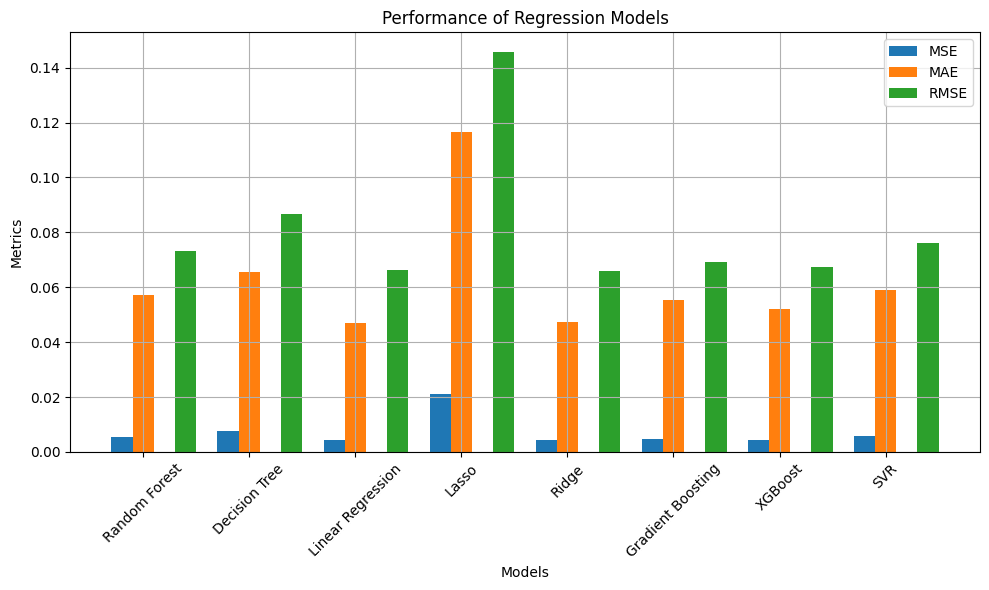

In [ ]:
models = ['Random Forest', 'Decision Tree', 'Linear Regression', 'Lasso', 'Ridge', 'Gradient Boosting', 'XGBoost', 'SVR']

mse = [0.0054, 0.0075, 0.0044, 0.0212, 0.0043, 0.0048, 0.0045, 0.0058]
mae = [0.0573, 0.0657, 0.0471, 0.1165, 0.0475, 0.0555, 0.0521, 0.0590]
rmse = [0.0733, 0.0866, 0.0661, 0.1456, 0.0659, 0.0691, 0.0672, 0.0760]

plt.figure(figsize=(10, 6))

bar_width = 0.2
index = range(len(models))

plt.bar([i + bar_width for i in index], mse, bar_width, label='MSE')
plt.bar([i + 2 * bar_width for i in index], mae, bar_width, label='MAE')
plt.bar([i + 4 * bar_width for i in index], rmse, bar_width, label='RMSE')

plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Performance of Regression Models')
plt.xticks([i + 2 * bar_width for i in index], models, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

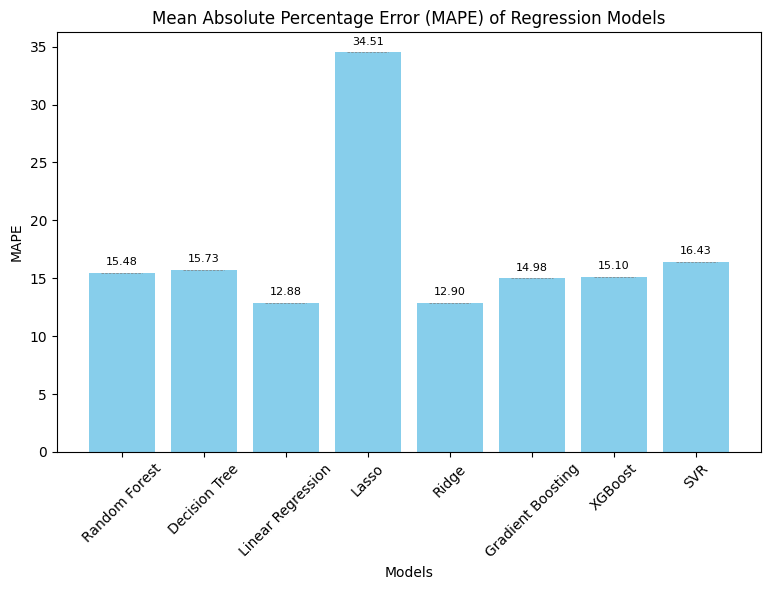

In [ ]:
models = ['Random Forest', 'Decision Tree', 'Linear Regression', 'Lasso', 'Ridge', 'Gradient Boosting', 'XGBoost', 'SVR']

# Performance metrics
mape = [15.48, 15.73, 12.88, 34.51, 12.90, 14.98, 15.10, 16.43]
mse = [0.0054, 0.0075, 0.0044, 0.0212, 0.0043, 0.0048, 0.0045, 0.0058]
mae = [0.0573, 0.0657, 0.0471, 0.1165, 0.0475, 0.0555, 0.0521, 0.0590]
r2_score = [0.7291, 0.6221, 0.7798, -0.0690, 0.7811, 0.7596, 0.7726, 0.7091]
rmse = [0.0733, 0.0866, 0.0661, 0.1456, 0.0659, 0.0691, 0.0672, 0.0760]

# Create plots
plt.figure(figsize=(15, 6))

# Plot MAPE
plt.subplot(1, 2, 1)
plt.bar(models, mape, color='skyblue')
plt.xlabel('Models')
plt.ylabel('MAPE')
plt.title('Mean Absolute Percentage Error (MAPE) of Regression Models')
plt.xticks(rotation=45)



# Connect lines between models
for i in range(len(models)):
    plt.plot([i-0.25, i+0.25], [mape[i], mape[i]], color='gray', linestyle='--', linewidth=0.5)
    plt.text(i, mape[i]+0.5, f'{mape[i]:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()